# Analysis of Salaries

In [37]:
# Dependencies
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt

import scipy.stats as sts

%matplotlib inline

In [8]:
# SQLAlchemy
from sqlalchemy import create_engine


In [9]:
# Postgres username, password, and database name
from config import POSTGRES_ADDRESS
from config import POSTGRES_PORT 
from config import POSTGRES_USERNAME
from config import POSTGRES_PASSWORD
from config import POSTGRES_DBNAME


In [10]:
# Create string that contains necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,
                                                                                        password=POSTGRES_PASSWORD,
                                                                                        ipaddress=POSTGRES_ADDRESS,
                                                                                        port=POSTGRES_PORT,
                                                                                        dbname=POSTGRES_DBNAME))

# Create connection 
conn = create_engine(postgres_str)

In [16]:
# Load necessary tables from Postgres to Pandas dataframes
employees = pd.read_sql_query("SELECT * FROM employees", conn)
salaries = pd.read_sql_query("SELECT * FROM salaries", conn)
titles = pd.read_sql_query("SELECT * FROM titles", conn)

In [90]:
# Show salary descriptive statistics 
employee_salaries = salaries.salary
employee_salaries = pd.Series(employee_salaries)

min_salary = np.min(employee_salaries)
max_salary = np.max(employee_salaries) 
mean = np.mean(employee_salaries)
std = np.std(employee_salaries)
median = np.median(employee_salaries)

print("The minimum salary is $", round(min_salary,2))
print("The maximum salary is $", round(max_salary,2))
print("The mean salary is $", round(mean,2))
print("The standard deviation of the salaries is $", round(std,2))
print("The median salary is $", round(median,2))

The minimum salary is $ 40000
The maximum salary is $ 129492
The mean salary is $ 52970.73
The standard deviation of the salaries is $ 14301.45
The median salary is $ 48681.0


## Salary Frequency

Text(51115.05, 80000, 'Median Salary: $ 48,681.00')

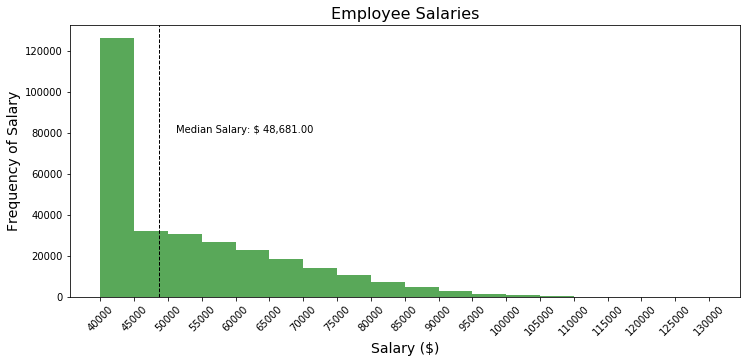

In [104]:
# Create histogram of salaries
# Split salaries into 5k ranges 
m = min_salary
b = 5000
bins = [m, m+b, m+2*b, m+3*b, m+4*b, m+5*b,m+6*b,m+7*b,m+8*b,m+9*b,
        m+10*b,m+11*b,m+12*b,m+13*b,m+14*b,m+15*b,m+16*b,m+17*b,m+18*b]

fig, ax = plt.subplots(figsize=(12,5))
plt.hist(employee_salaries, bins=bins, color='forestgreen', alpha=0.75)
plt.title('Employee Salaries', fontsize="16")
plt.xlabel("Salary ($)", fontsize="14")
plt.ylabel("Frequency of Salary", fontsize="14")

# Set ticks and rotate to 45 degrees
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=45)

# Plot median line and label
plt.axvline(median, color='k', linestyle='dashed', linewidth='1')
plt.text(median*1.05, 80000, 'Median Salary: $ {:,.2f}'.format(median))

# Salary by Title

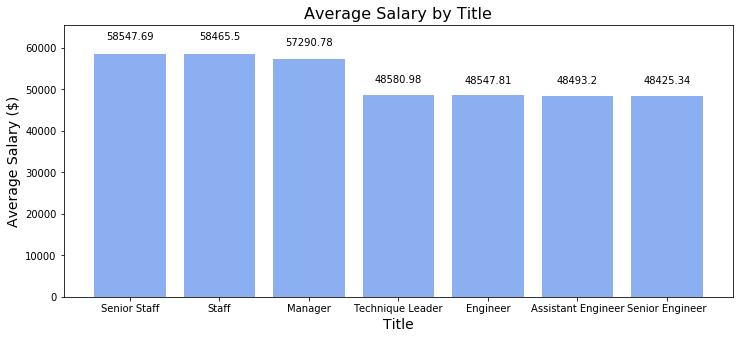

In [186]:
salaries_titles = pd.merge(salaries, titles, on="emp_no", how="left" )

# The salaries table does not show more than one salary per employee
# This seems wrong, as some employees changed titles (promotions) during tenure
# The salaries table only reflects their initial salary after hire
# As such, I will not use any titles they acquired after promotions and only their initial titles

salaries_titles = salaries_titles.sort_values('from_date_y').drop_duplicates('emp_no', keep='first')
salaries_titles

# Group by title and find average salary
title_groups = salaries_titles.groupby('title').mean()
title_groups = title_groups.sort_values('salary', ascending=False)
title_groups = title_groups.reset_index()

# Create bar plot
x_values = title_groups['title']
y_values = round(title_groups['salary'],2)

fig, ax = plt.subplots(figsize=(12,5))
bar_plot = plt.bar(x_values, y_values, color='cornflowerblue', alpha=0.75, align='center')
plt.title('Average Salary by Title', fontsize="16")
plt.xlabel("Title", fontsize="14")
plt.ylabel("Average Salary ($)", fontsize="14")
plt.ylim(0, y_values.max() + 7000)

def autolabel(rects):
    for idx, rect in enumerate(bar_plot):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, 1.05*height, y_values[idx],
                ha='center', va='bottom', rotation=0)
        
autolabel(bar_plot)